In [1]:
from octo.model.octo_model import OctoModel
model = OctoModel.load_pretrained("hf://rail-berkeley/octo-small")

2024-03-25 15:15:32.133234: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 15:15:32.133261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 15:15:32.134019: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-25 15:15:32.838520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_t

In [2]:
print(model.dataset_statistics["bridge_dataset"]['action']['mean'])

[ 0.00021161  0.00012614 -0.00017022 -0.00015062 -0.00023831  0.00025646
  0.        ]


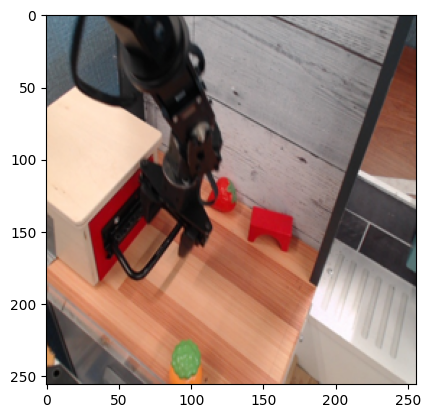

In [3]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

# download one example BridgeV2 image
IMAGE_URL = "https://rail.eecs.berkeley.edu/datasets/bridge_release/raw/bridge_data_v2/datacol2_toykitchen7/drawer_pnp/01/2023-04-19_09-18-15/raw/traj_group0/traj0/images0/im_12.jpg"
img = np.array(Image.open(requests.get(IMAGE_URL, stream=True).raw).resize((256, 256)))
plt.imshow(img)

In [5]:
# create obs & task dict, run inference
import jax

# add batch + time horizon 1
img = img[np.newaxis,np.newaxis,...]
observation = {"image_primary": img, "pad_mask": np.array([[True]])}
task = model.create_tasks(texts=["pick up the fork"])
action = model.sample_actions(observation, task, rng=jax.random.PRNGKey(0))
print(action)   # [batch, action_chunk, action_dim]

[[[ 0.364952    0.12511285 -0.22880746  0.37150204  0.17125104
   -0.14896764  1.0021179 ]
  [ 0.477954    0.09790012 -0.30897662  0.42650416  0.20490614
   -0.15810347  0.9915069 ]
  [ 0.4601239  -0.24506798 -0.58667195 -1.1696913   0.5653806
   -0.29335195  0.9841581 ]
  [ 0.24021226 -0.44443035 -0.28501505 -1.6027738  -0.32400694
    0.28871554  1.0000067 ]]]


In [9]:
import cv2
import jax
import tensorflow as tf
import tensorflow_datasets as tfds
import tqdm
import rlds
import mediapy as media
from PIL import Image
from IPython import display

ModuleNotFoundError: No module named 'reverb'